## Improving Decision Trees

In [680]:
# importing libraries
import numpy as np
import pandas as pd
import missingno
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve, auc
from subprocess import call

In [681]:
# Readin the titanic dataset

df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [682]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

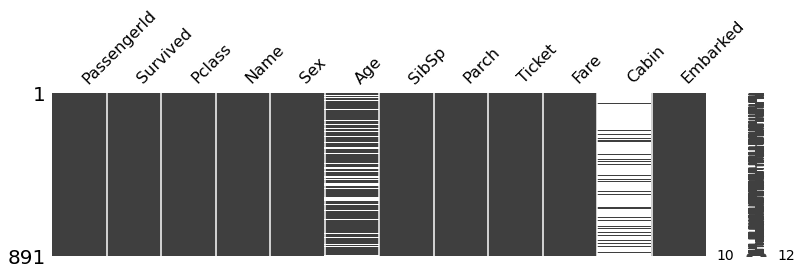

In [683]:
# Visualise missing data
missingno.matrix(df, figsize = (13,3))

In [684]:
# get the number of missing data points per column

missing_values_count = df.isnull().sum()

# percentage of missing values

missing_values_count / len(df) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

#### Dealing with Missing Data

    1. Age can be imputed over by the median value
    2. Cabin values contain 77% missing data, therefore we can drop the entire column
    3. Embarked can be imputed over by using the mode of the column

In [685]:
# Imputing over Age

median_age = df.Age.median()
df.Age.fillna(median_age, inplace = True)

In [686]:
# Dropping Cabin column

df.drop('Cabin', axis = 1,inplace = True)

In [687]:
# Replacing Null values in Embark with the mode

df.Embarked = df.Embarked.fillna(df['Embarked'].mode()[0])

SibSp stands for sibling count

Parch stands for parent count

We can combine these 2 column into 1 distinct column to reflect family size

In [688]:
df['Family'] = df['SibSp'] + df['Parch']+1

#### Dropping irrelevant Data

We combined SibSp and Parch into 1 column called family. We may then drop these 2 columns as their data is stored in the new column.

Name does not impart any relevant meaning for our analysis as we are mainly concerned with the sex/gender of the person.

PaseengerID as well as Ticket number, I believe  doesnt depict any relevant meaning for our analysis.

In [689]:
df = df.drop(['Name','Ticket','SibSp','Parch', 'PassengerId'], axis = 1)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


In [690]:
# Encoding Categorical Values 

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

le = LabelEncoder()
df['Embarked'] = le.fit_transform(df['Embarked'])

df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,1,22.0,7.2500,2,2
1,1,1,0,38.0,71.2833,0,2
2,1,3,0,26.0,7.9250,2,1
3,1,1,0,35.0,53.1000,2,2
4,0,3,1,35.0,8.0500,2,1


#### Preparing X and y variables

In [691]:
X = df.loc[:,df.columns != 'Survived']
y = df.Survived

In [692]:
# Splitting data into training, development and testing
# 60% trained data, 25% development and 15% test

# Performing initial Split into trained and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=42, stratify=y)

# Further splitting the testing set into Validation and test
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, train_size=0.375, random_state=42, stratify=y_test)


print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(534, 6)
(224, 6)
(133, 6)


In [693]:
# training a model on the development set

trained = DecisionTreeClassifier(max_depth=None, random_state=42)
trained.fit(X_train, y_train)
print("Accuracy without a Specified Max Depth:", trained.score(X_valid, y_valid))
print("At depth:", trained.tree_.max_depth)

Accuracy without a Specified Max Depth: 0.7723214285714286
At depth: 17


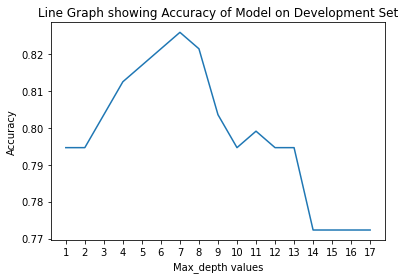

In [694]:
# Plotting the Effect on a line Graph  
no_depths = range(1,trained.tree_.max_depth+1)

no_depth_scores = [] 
for d in no_depths:
  clf = DecisionTreeClassifier(max_depth=d, random_state=42)
  clf.fit(X_train, y_train)
  score = clf.score(X_valid, y_valid)
  no_depth_scores.append(score)

fig, ax = plt.subplots()
ax.plot(no_depths, no_depth_scores)
plt.xlabel("Max_depth values")
plt.ylabel("Accuracy")
ax.xaxis.set_ticks(no_depths)
plt.title('Line Graph showing Accuracy of Model on Development Set')
plt.show()

### Creating Different Models

For this task, we will be creating 3 different decision tree models:

    1. Decision Tree
    2. Bagging the Dataset
    3. Random Forest Technique
    4. Boosted Tree Technique
    
We will be using our trained data to make predictions on the Development dataset. Once we are happy with the accuracy of each model, we will then choose the best model based of the development dataset and apply it to our test dataset.

#### Decision Tree

In [696]:
trained = DecisionTreeClassifier(max_depth=None, random_state=42)
trained.fit(X_train, y_train)

print("Accuracy of a Decision Tree:", trained.score(X_valid, y_valid))

Accuracy of a Decision Tree: 0.7723214285714286


#### Bagged Classifier

In [699]:
# Creating a comparison between Initial Decision Tree model and Bagged model

ensemble = BaggingClassifier(base_estimator=trained, n_estimators=100, random_state=42)

ensemble.fit(X_train,y_train)

print("Accuracy of Development Dataset using Bagging Method:\n=",ensemble.score(X_valid, y_valid))

Accuracy of Development Dataset using Bagging Method:
= 0.7991071428571429


Here we see that our initial Decison Tree  gave a model accuracy score of 77.23% while our Bagged Dataset approach gave us a model accuracy score of 79.91%. These scores are based on how accurately our model can make predictions for our 25% development datasets. 

#### Random Forest Classifier

In [675]:
# Create a comparision between initial Decision Tree model and Random Forest Model.

forest = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)

forest.fit(X_train, y_train)

print("Accuracy of Development Dataset using Random Forests:\n=",forest.score(X_valid, y_valid))

Accuracy of Development Dataset using Random Forests:
= 0.7946428571428571


In [676]:
# We first need to calculate the oob_score
# This gives us the R^2 score of our model which will allow us to calcualte the c-stat of our Random Forest model.

forest = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)

forest.fit(X_train, y_train)

print("Out-of-Bag Score of Development Dataset using Random Forests:\n=",forest.oob_score_)

Out-of-Bag Score of Development Dataset using Random Forests:
= 0.3742683962175124


The Out of Bag Score is another name for the R^2 of the model. Currently our Random Forest model is displaying a R^2 value of 0.37

What we find here is that our Random Forest Model gave is that there is a low correlation between our data features to the y variable.

In [677]:
# Calculate the c-stat of the model

y_oob = forest.oob_prediction_
print('c-stat: ', roc_auc_score(y_train, y_oob))

c-stat:  0.8531173548817554


The C-Stat is a value that allows us to impose a value to the goodness of fit of our model. The closer that value is to 1, the more likely the model is able to make accurate predictions. Our C-Stat of the random forest model is shown as 0.853. This is a very good score and the Random Forest Model has a high chance of making accurate predictions.

####  Boosted Tree Classifier

In [701]:
# Create a Boosted Tree model

boost = AdaBoostClassifier(n_estimators=100, random_state=42)

boost.fit(X_train, y_train)

print('Accuracy of Development Dataset using the Boosted Tree model:\n',boost.score(X_valid,y_valid))

Accuracy of Development Dataset using the Boosted Tree model:
 0.8080357142857143


## Feature Importance

### Using the Random Forest Model

We first have to normalize our dataset as Fare and Age contain values with large ranges compare to the other numeric data values contained in our data set

#### Normalizing the Data Set

In [604]:
# Dropping Column 'Survived'
LABEL = 'Survived'
y = df[LABEL]
df = df.drop(LABEL, axis=1)

# Scaling our dataset

scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(df)

scaled_train = pd.DataFrame(scaled_train, columns=df.columns, index=df.index)

scaled_train.head()

,Pclass,Sex,Age,Fare,Embarked,Family
0,1.0,1.0,0.271174,0.014151,1.0,0.1
1,0.0,0.0,0.472229,0.139136,0.0,0.1
2,1.0,0.0,0.321438,0.015469,1.0,0.0
3,0.0,0.0,0.434531,0.103644,1.0,0.1
4,1.0,1.0,0.434531,0.015713,1.0,0.0


In [621]:
# Splitting our newly scaled data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(scaled_train, y, test_size=0.25, shuffle=True)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training set
clf.fit(X_train, y_train)

(668, 6) (223, 6)
(668,) (223,)


RandomForestClassifier()

In [622]:
# Creating a simple version to show all variables
R_forest = RandomForestClassifier(n_estimators=100, random_state=42)

R_forest.fit(X_train, y_train)

feature_importance = pd.Series(R_forest.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_importance

Sex         0.281316
Fare        0.265162
Age         0.255001
Pclass      0.084152
Family      0.082858
Embarked    0.031511
dtype: float64

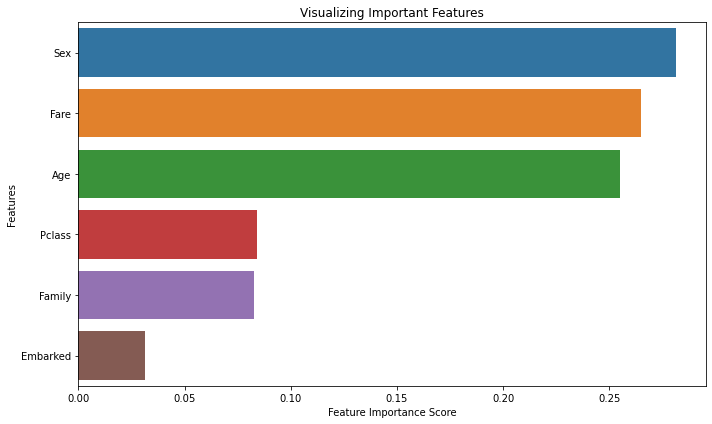

In [623]:
# Creating a graph to depict Feature Importance

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()

Here we see that Sex, Fare and Age are all high contributors to whether a passenger survived or not. Sex shows the highest predictor to survival from our trained dataset. Fare can be reasoned that depending on which cabin you paid for, correlates to where on the ship you were positioned during the sinking. Age is the third highest contributor to survival and can be inferred that Age determines whether or not you are a child or Adult. Children were more likelt to have survived than Adults.

## Model Tuning

### Selecting Random Forests

#### n_estimators

30 trees
c-stat: 0.8547962454212454

50 trees
c-stat: 0.8585927960927962

100 trees
c-stat: 0.8600713522588522

200 trees
c-stat: 0.8640586843711843

500 trees
c-stat: 0.8649505876068376

1000 trees
c-stat: 0.8648075015262515

2000 trees
c-stat: 0.8652892246642248



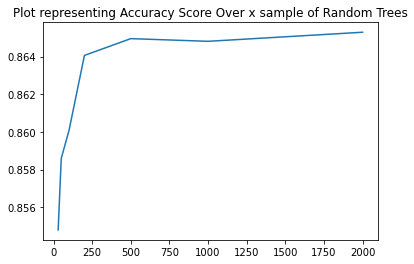

In [628]:
# Creating a function to iterate over multiple n_estimates of the dataset
results = []
n_estimator_options = [30, 50, 100, 200, 500, 1000, 2000]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(X_train, y_train)
    print(trees, 'trees')
    roc = roc_auc_score(y_train, model.oob_prediction_)
    print('c-stat:',roc)
    results.append(roc)
    print('')

pd.Series(results, n_estimator_options).plot()
plt.title('Plot representing Accuracy Score Over x sample of Random Trees')
plt.show()

Here what I have done was simulate our random forest generating predictions over 30, 50, 500, 2000 etc samples. We find that initially there is an increase in accuracy, however, as it tend towards 500 samples, our model begins to stable out. This means that we do not need to simulate anymore than 500 trees to achieve optimum accuracy of the model.

#### Minimum Samples per branch

2 Min_Samples
c-stat: 0.8659092643467643

4 Min_Samples
c-stat: 0.8724149114774116

6 Min_Samples
c-stat: 0.8741080967643468

8 Min_Samples
c-stat: 0.8734260531135533

10 Min_Samples
c-stat: 0.8752432463369964

12 Min_Samples
c-stat: 0.8752289377289378

14 Min_Samples
c-stat: 0.8728441697191698

16 Min_Samples
c-stat: 0.8699490613553114



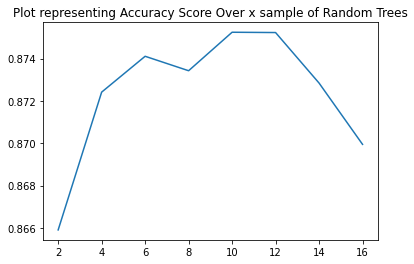

In [634]:
# Create a function to show how accurate the model performs based on minimum observations needed

results = []
min_sample_option = [2, 4, 6, 8, 10, 12, 14, 16]

for min_sample in min_sample_option:
    model = RandomForestRegressor(n_estimators=100, oob_score=True, n_jobs=-1, random_state=42, max_features='auto',
                                 min_samples_leaf=min_sample)
    model.fit(X_train, y_train)
    print(min_sample, 'Min_Samples')
    roc = roc_auc_score(y_train, model.oob_prediction_)
    print('c-stat:',roc)
    results.append(roc)
    print('')

pd.Series(results, min_sample_option).plot()
plt.title('Plot representing Accuracy Score Over x sample of Random Trees')
plt.show()

What we find from the above values, is where, based on the sample size, do we tend to maximise our data. We find that where we continue to split our data between 10 and 12 splits, we obtained the best accuracy of the random tree model. 

#### Max Tree Depth

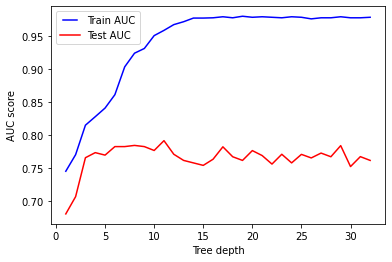

In [647]:
# Create a function to depict Max Tree depth needed for Optimum accuracy

max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

The trees perfectly predicts all of the trained data, however, it fails to generalize the findings for new data.

### Initial Random Forest Tree

In [656]:
# Producing the initla accuracy and c-stat score of the model before pruning
forest = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)

forest.fit(X_train, y_train)

print("Accuracy of Trained Dataset using Random Forests:\n=",forest.score(X_test, y_test))

# Calculate the c-stat of the model

Cforest = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)
Cforest.fit(X_train, y_train)
y_oob = Cforest.oob_prediction_
print('c-stat:\n=', roc_auc_score(y_train, y_oob))

Accuracy of Trained Dataset using Random Forests:
= 0.7713004484304933
c-stat:
= 0.8600713522588522


### Final Random Forest with Pruning

In [657]:
Rforest = RandomForestClassifier(n_estimators=500, oob_score=True, random_state=42, max_depth=15, min_samples_leaf=12)

Rforest.fit(X_train, y_train)

print("Accuracy of Trained Dataset using Random Forests:\n=",Rforest.score(X_test, y_test))

# Calculate the c-stat of the model

R_forest = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42, max_depth=15, min_samples_leaf=12)
R_forest.fit(X_train, y_train)
y_oob = R_forest.oob_prediction_
print('c-stat:\n=', roc_auc_score(y_train, y_oob))

Accuracy of Trained Dataset using Random Forests:
= 0.7937219730941704
c-stat:
= 0.8752289377289378


## Best Model

#### Decision Tree

Accuracy Score = 0.7723214285714286
Max_depth = None

#### Bagging

Accuracy Score = 0.7991071428571429

#### Random Forest

Accuracy Score = 0.7937219730941704
Max_depth = 12

#### Boosting

Accuracy Score = 0.8080357142857143

Above are the calculated Accuracy scores of each model. The score gives us an indication as to how well suited the model is for perdicting unkown and new data. We see that our initial Decision Tree performed the worst with the Boosted Tree having performed the best. 